# Least Squares Fit

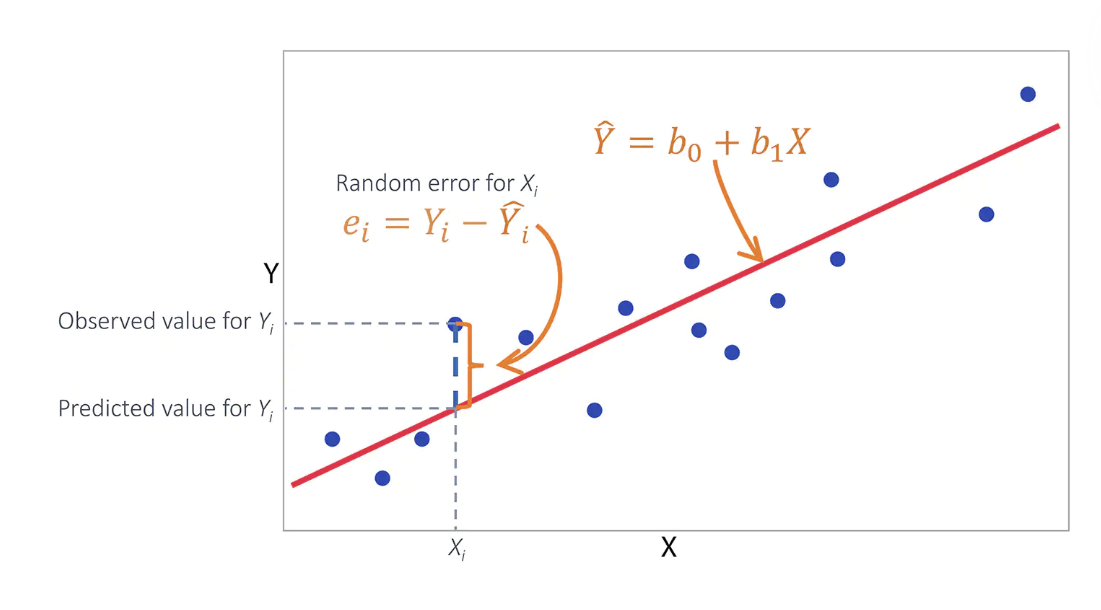

In [66]:
from IPython.display import Image
Image(filename='969.png',width="750")

- 근사적으로 구하려는 해와 실제 해의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법이다. <br>

1. n+1개의 데이터 포인트$(x_i , y_i)$를 평균적으로 맞추는 다항식을 가진다. ($i=0,1,2,3,...n$) $$f(x) = f(x;a_0,a_1,a_2,...,a_m)$$


2. 다음 함수를 최소화한다. 여기서 $r_i=y_i-f(x_i)$는 잔차라고 하며 x에서의 데이터 점들과 회귀 함수간의 불일치를 나타낸다. $$S(a_0,a_1,...,a_m) = \sum_{n=0}^n\big[y_i - f(x_i)\big]^2$$ 

3. 회귀 곡선에 대한 데이터 확산은 표준편차로 정량화 된다.
$$\sigma = \sqrt{\frac{S}{n-m}}$$

### Linear Forms
데이터를 직선 $f(x)=a+bx$에 맞춘다.

최소화 되어야 할 함수는 다음과 같다.$$S(a,b) = \sum_{n=0}^n\big[y_i - f(x_i)\big]^2 = \sum_{n=0}^n(y_i - a-bx_i)^2$$

최소화 하기 위해서 
$$\frac{\delta S}{\delta a}=\sum_{n=0}^n -2(y_i-a-bx_i) = 2\Big[a(n+1) + b \sum_{i=0}^n x_i -   \sum_{i=0}^n y_i\Big] =0$$
$$\frac{\delta S}{\delta b}=\sum_{n=0}^n-2(y_i-a-bx_i)x_i =2\Big[a\sum_{i=0}^n x_i + b \sum_{i=0}^n x_i^2 -   \sum_{i=0}^n x_iy_i\Big] =0 $$

두 방정식을 2(n+1)로 나누고 항을 정리해 a,b를 구한다.

$$b=\frac{\sum y_i(x_i-\overline{x})}{\sum x_i(x_i-\overline{x})} ~~~, a=\overline{y}-\overline{x}b$$

여기서 $$\overline{x} = \frac{1}{n+1} \sum_{i=0}^n x_i ,~~~\overline{y} = \frac{1}{n+1} \sum_{i=0}^n y_i$$

### Example.
x = [0, 1, 2] <br>
y = [2, 3, 5] <br>
인 데이터에 직선을 맞추고 표준편차를 계산하세요.


1.0 3.3333333333333335
1.8333333333333335


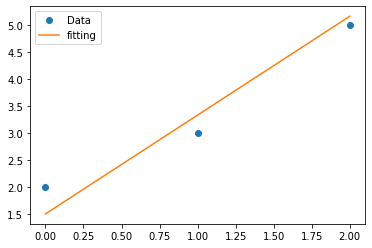

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0, 1, 2], dtype=float)
y_data = np.array([2, 3, 5], dtype=float)

n = len(x_data)

x_avg = 0
y_avg = 0

for i in range(n) : 
    x_avg += x_data[i]
    y_avg += y_data[i]
x_avg /= n
y_avg /= n

# fitting to 1th order polynomial

print(x_avg, y_avg)
above = 0
below = 0
for i in range(n) : 
    above += y_data[i] * (x_data[i] - x_avg)
    below += x_data[i] * (x_data[i] - x_avg)

intercept = above / below
slope = y_avg - x_avg * intercept

print(slope)
plt.plot(x_data, y_data, 'o', label="Data")
plt.plot(np.linspace(min(x_data), max(x_data)), slope * np.linspace(min(x_data), max(x_data)) + intercept, label="fitting")
plt.legend()
plt.show()

### Polynomial Fit
선형 형태의 최소 제곱 회귀를 고려해본다.
$$f(x)=a_0f_0(x) + a_1f_1(x) + a_2f_2(x) + ... + a_mf_m(x) =\sum_{j=0}^m a_jf_j(x)$$

최소화 될 함수는 다음과 같다.$$S=\sum_{i=0}^n\Big[y_i - \sum_{j=0}^m a_jf_j(x_i)\Big]^2$$

최소화 하기 위해 미분한 값을 0으로 둔다. $$\frac{\delta S}{\delta a_k} = -2{\sum_{i=0}^n \Big[y_i - \sum_{j=0}^m a_jf_j(x_i)\Big]f_k(x_i)}=0$$

$$\sum_{j=0}^m \Big[\sum_{i=0}^n f_j(x_i)f_k(x_i)\Big]a_j = \sum_{i=0}^n f_k(x_i)y_i , ~~~~~k=0,1,...,m$$

행렬표기법은 다음과 같다.$$Aa = b$$

$$A_{kj} = \sum_{i=0}^n f_j(x_i)f_k(x_i) ,~~~ b_k=\sum_{i=0}^nf_k(x_i)y_i$$

$$A =
 \begin{pmatrix}
  n & \sum x_i & \sum x_i^2 &\cdots &\sum x_i^m \\
  \sum x_i & \sum x_i^2 & \sum x_i^3 &\cdots & \sum x_{i}^{m+1} \\
  \vdots  & \vdots &\vdots & \ddots & \vdots  \\
  \sum x_{i}^{m-1} & \sum x_{i}^{m} &\sum x_{i}^{m+1}& \cdots & \sum x_{i}^{2m}
 \end{pmatrix} , 
 b= \begin{pmatrix}
   \sum y_i  \\
  \sum x_iy_i  \\
  \vdots   \\
  \sum x_{i}^{m}y_i \\
 \end{pmatrix} $$

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([-1.0, -0.5, 0, 0.5, 1.0])
y_data = np.array([-1.00, -0.55, 0.00, 0.45, 1.00])

# poly_deg = 2 --> 0, 1, 2 --> m = 2
def create_b(x_data, y_data, poly_deg) : 
    # assert (type(x_data) == type(np.ndarray)) and (type(y_data) == type(np.ndarray))

    n = len(x_data)
    m = poly_deg
    B = np.zeros(shape=(m + 1, 1), dtype=float)
    for i in range(m + 1) : 
        sum = 0
        for j in range(n) : 
            sum += (x_data[j] ** i) * y_data[j]
        B[i] = sum

    return B

def create_a(x_data, poly_deg) : 
    # assert (type(x_data) == type(np.ndarray()))
    
    n = len(x_data)
    m = poly_deg
    A = np.zeros(shape=(m + 1, m + 1), dtype=float)
    
    for i in range(m) : 
        for j in range(m) : 
            sum = 0
            for k in range(n) : 
                sum += x_data[k]**(i + j)
            A[i,j] = sum
    
    return A

A = create_a(x_data=x_data, poly_deg=len(x_data) - 1)
B = create_b(x_data=x_data, y_data=y_data, poly_deg=len(x_data) - 1)

print(A)
print(B)
coef = np.linalg.solve(A, B)
print(coef)

[[5.      0.      2.5     0.      0.     ]
 [0.      2.5     0.      2.125   0.     ]
 [2.5     0.      2.125   0.      0.     ]
 [0.      2.125   0.      2.03125 0.     ]
 [0.      0.      0.      0.      0.     ]]
[[-0.1    ]
 [ 2.5    ]
 [-0.025  ]
 [ 2.125  ]
 [-0.00625]]


LinAlgError: Singular matrix

In [11]:
import numpy as np
import math

xData = np.array([-1.0,-0.5,0,0.5,1.0])
yData = np.array([-1.00,-0.55,0.00,0.45,1.00])


i: 0 [-1.  0.]
i: 0 [-1.  1.]
i: 1 [-1.55  1.  ]
i: 1 [-1.55   1.275]
i: 2 [-1.55   1.275]
i: 2 [-1.55   1.275]
i: 3 [-1.1    1.275]
i: 3 [-1.1  1.5]
i: 4 [-0.1  1.5]
i: 4 [-0.1  2.5]
[-0.02  1.  ]
0.031622776601683805


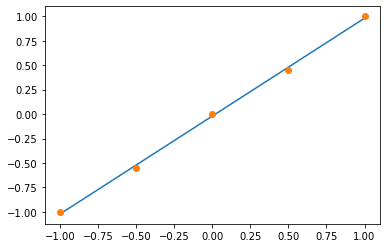

In [31]:
import numpy as np
import matplotlib.pyplot as plt



### Weighting of Data

데이터의 정확성이 각 점마다 다를 수 있다. 이런 상황에서 각 데이터 포인트에 신뢰계수 또는 가중치를 할당해 가중치 잔차의 제곱의 합을 최소화 한다.
최소화할 함수는 다음과 같다.
$$S(a_0,a_1,...,a_m) = \sum_{i=0}^n W_i^2\big[y_i-f(x_i)\big]^2$$

회귀 함수가 f(x)=a+bx이면 
$$S(a,b)=\sum_{i=0}^n W_i^2(y_i - a-bx_i)^2$$ 

S를 최소화 하기 위한 조건
$$\frac{\delta S}{\delta a}=-2\sum_{i=0}^n W_i^2(y_i - a-bx_i)=0~~~~\Rightarrow~~~~ a\sum_{i=0}^n W_i^2 + b\sum_{i=0}^n W_i^2 x_i= \sum_{i=0}^n W_i^2y_i$$
$$\frac{\delta S}{\delta b}=-2\sum_{i=0}^n W_i^2(y_i - a-bx_i)x_i=0~~~~\Rightarrow~~~~ a\sum_{i=0}^n W_i^2x_i+ b\sum_{i=0}^n W_i^2 x_i^2= \sum_{i=0}^n W_i^2x_iy_i$$

$\sum_{i=0}^n W_i^2$ 으로 나눠 정리하면 가중평균 $\widehat{x}=\frac{\sum W_i^2 x_i}{\sum W_i^2} ,\widehat{y}=\frac{\sum W_i^2 y_i}{\sum W_i^2} $에서 다음 방정식을 얻는다.

$$b= \frac{\sum W_i^2 y_i (x_i-\widehat{x})}{\sum W_i^2 x_i (x_i-\widehat{x})} ,~~~~ a =\widehat{y} - b\widehat{x}$$

### Exponential functions

$f(x) = ae^{bx}$가 있다고 가정하자. 이 함수는 $ln y$에 적합하면 선형 회귀로 변환된다.

$$F(x) = ln f(x) = ln a+bx$$
함수 $F(x)$는 데이터 포인트 $(x_i,ln y_i)~~ i=0,1,...n$을 지난다.

로그회귀 잔차 : $$R_i = ln y_i - F(x_i) = ln y_i -(ln a+bx_i)$$

$z = ln y$를 구해 다음을 구한다.
$$b = \frac{\sum z_i(x_i-\widehat{x})}{\sum x_i(x_i-\widehat{x})} ~~~~, A=\widehat{z}-\widehat{x}b$$

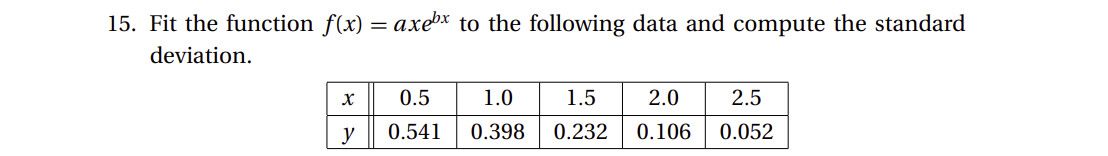

In [24]:
x=[0.5,1.0,1.5,2.0,2.5]
y=[0.541,0.398,0.232,0.106,0.052]


[-0.614336   -0.92130327 -1.46101791 -2.24431618 -2.95651156]
Coefficients are:
 [ 0.16271222 -1.20147281]
Std. deviation = 0.17330457622666834


# Roots of Equation

### 1. Incremental Search Method (Rootsearch method)

**Basic Idea** : $f(x_1), f(x_2)$가 서로 반대 부호를 가지면 간격 $(x_1,x_2)$ 사이에 적어도 하나의 근이 있다.

간격(a,b)에서 증분 dx단위로 사용자 제공 함수 f(x)의 근을 검색한다.

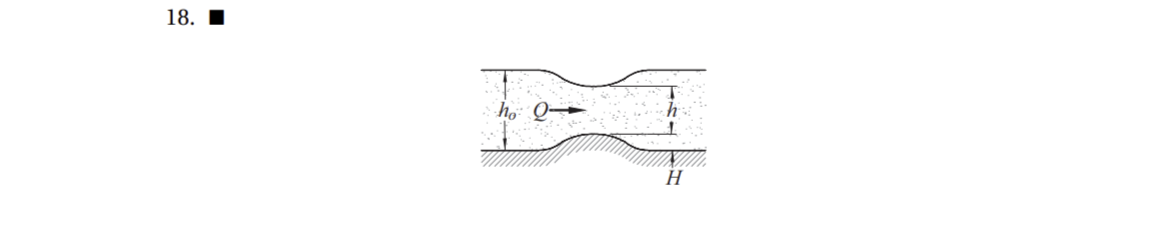

In [68]:
from IPython.display import Image
Image(filename='967.png',width="1000")

Bernoulli's equation for fluid flow in an open channel with a small bump is $$\frac{Q^2}{2gb^2h_0^2} + h_0 = \frac{Q^2}{2gb^2h^2} + h + H$$ where $Q=1.2 m^3/s$ = volume rate of flow <br>
$g=9.81 m/s^2$ = gravitational acceleration<br>
$b=1.8m$ = width of channel<br>
$h_0=0.6$ = upstream water level<br>
$H=0.075m$ = height of bump<br>
$h=$ water level above the bump<br>
Determine $h$.

In [39]:
from numpy import sign
def rootsearch(f,a,b,dx):



In [40]:
from math import log
Q  = 1.2
b = 1.8
h0=0.6
H=0.075
g  = 9.81


h = 0.4950000000000001  m


### 2.Bisection


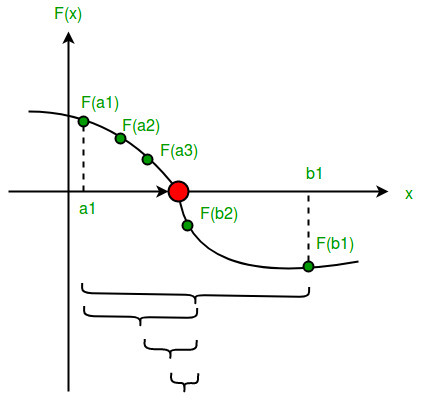

In [4]:
from IPython.display import Image
Image(filename='2.png',width="400")

- 구간 $(x_1, x_2)$에 근이 있으면 $f(x_1)$ 및 $f(x_2)$는 반대부호가 된다. 구간을 반으로 줄이기 위해 $f(x_3)$을 계산한다. 여기서 $x_3$는 $\frac{1}{2}(x_1+x_2)$이다.


- $f(x_2)$와 $f(x_3)$가 서로 반대 부호일 경우 근은 $(x_2,x_3)$에 존재하며 원래 경계점 $x_1$을 $x_3$으로 업데이트한다. $f(x_2)$와 $f(x_3)$가 같은부호이면 근은 $f(x_1,x_3)$사이에 있고 $x_2$는 $x_3$로 업데이트 된다.


- $|x_2-x_1|$ (새로운 구간) <= $\epsilon$일때까지 이분법이 반복된다.


- 규정된 $\epsilon$에 도달하는데 필요한 이분법 수는 다음과 같다. <br>
원래 구간 $\Delta x$는 이분할 후 $\Delta x/2$, 또 $\Delta x/2^2$로 줄어들며 n개의 이분 후에는 $\Delta x /2^n$으로 줄어든다.
$\Delta x/2^n = \epsilon$으로 설정하면  <br>

$$n = \frac{ln(\Delta x/\epsilon)}{ln 2}$$

In [60]:
import math
import sys
#import error
from numpy import sign
def bisection(f,x1,x2,switch=1,tol=1.0e-9):
  

In [63]:
def f(h):
    f =Q**2/(2*g*b**2*h0**2)+h0-Q**2/(2*g*b**2*h**2)-h-H
    return f

print("h =",bisection(f,0.3,0.6),' m')


h = 0.4957551243714987  m


### 3.Newton Raphson 


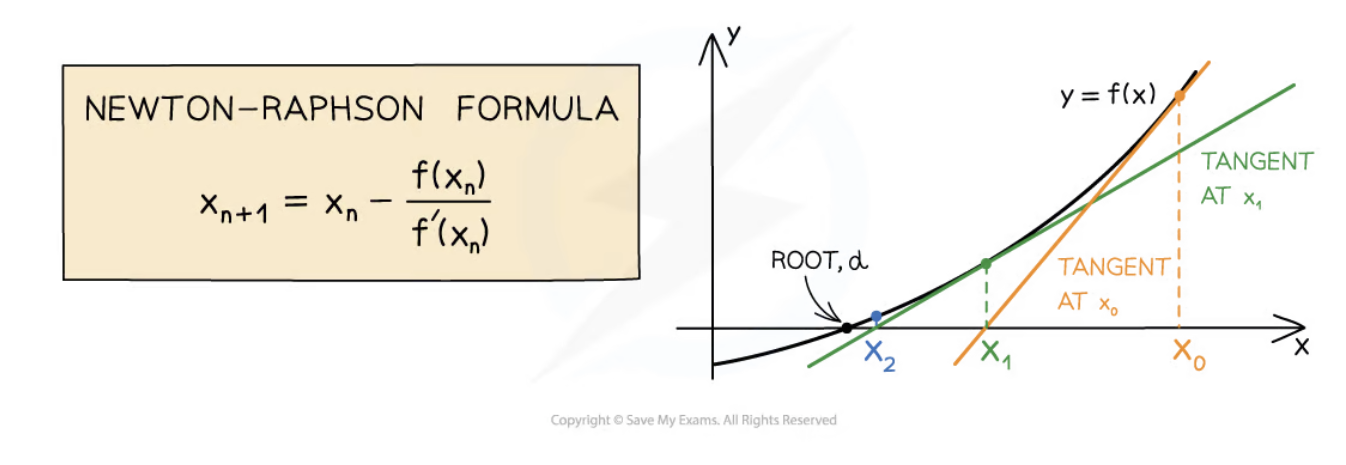

In [6]:
from IPython.display import Image
Image(filename='3.png',width="800")

테일러 급수를 이용해 함수를 선형화 한다. ($x_0 , f(x_0)$을 지나는 접선)

$$f(x) \approx f(x_0) + f'(x_0)(x-x0) $$

$x=x_{n+1}, ~~x_0=x_n$으로 두면 

$$f(x_{n+1}) \approx f(x_n) +f'(x_n)(x_{n+1}-x_n) $$ 

이식에서 $f(x_{n+1})$ 을 0으로 두면 $x_{n+1}$을 구할 수 있다.

$$x_{n+1} \approx x_{n}-\frac{f(x_n)}{f'(x_n)}$$

이 공식을 반복하다 보면 $x_{n+1}-x_n (\Delta x)$이 0으로 수렴한다.

*알고리즘:*


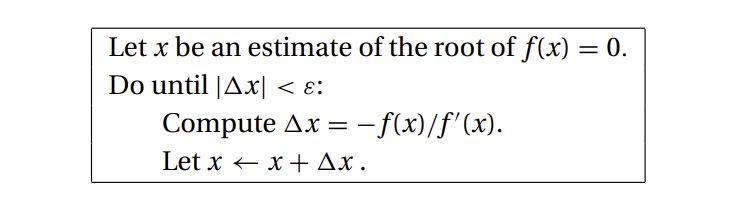

In [80]:
from IPython.display import Image
Image(filename='(970).png',width="500",)

아래 함수에서 가장 작은 양의 근을 찾으시오.
$$f(x)=x^4 - 6.4x^3 + 6.45x^2 +20.538x-31.752$$

In [12]:
def f(x): 
    return x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752

def df(x): 
    return 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538

def newtonRaphson(x,tol=1.0e-9):



Root = 2.0999999786199406
Number of iterations = 22


### 4. Newton Raphson2(연립방정식)

$$f_1(x_1,x_2,...,x_n)=0$$
$$f_2(x_1,x_2,...,x_n)=0$$
$$\vdots$$
$$f_n(x_1,x_2,...,x_n)=0$$

점 $x$에 대한 $f_i(x)$의 Taylor 시리즈 확장으로 시작한다.
$$f_i(x+\Delta x)\approx f_i(x) + \sum_{j=1}^n \frac{\delta f_i}{\delta x_j}\Delta x_j $$

**$$f(x+\Delta x)=f(x) + J(x)\Delta x$$** 
$J(x)$는 편미분으로 구성된 Jacobian 행렬이다. 
$$J_{ij}= \frac{\delta f_i}{\delta x_j} = \frac{f_i(x+e_jh)-f_i(x)}{h}$$

여기서 $h$는 $x_j$의 작은 증분, $e_j$는 $x_j$방향의 단위벡터 ,$\Delta x = e_jh$.

보정$\Delta x$를 찾기위해 $f(x+\Delta x)=0$으로 설정한다.

$$J(x)\Delta x = -f(x)$$

*알고리즘:*

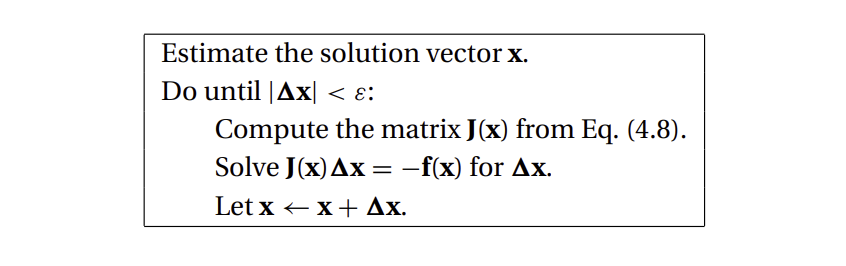

In [82]:
from IPython.display import Image
Image(filename='(971).png',width="500",)

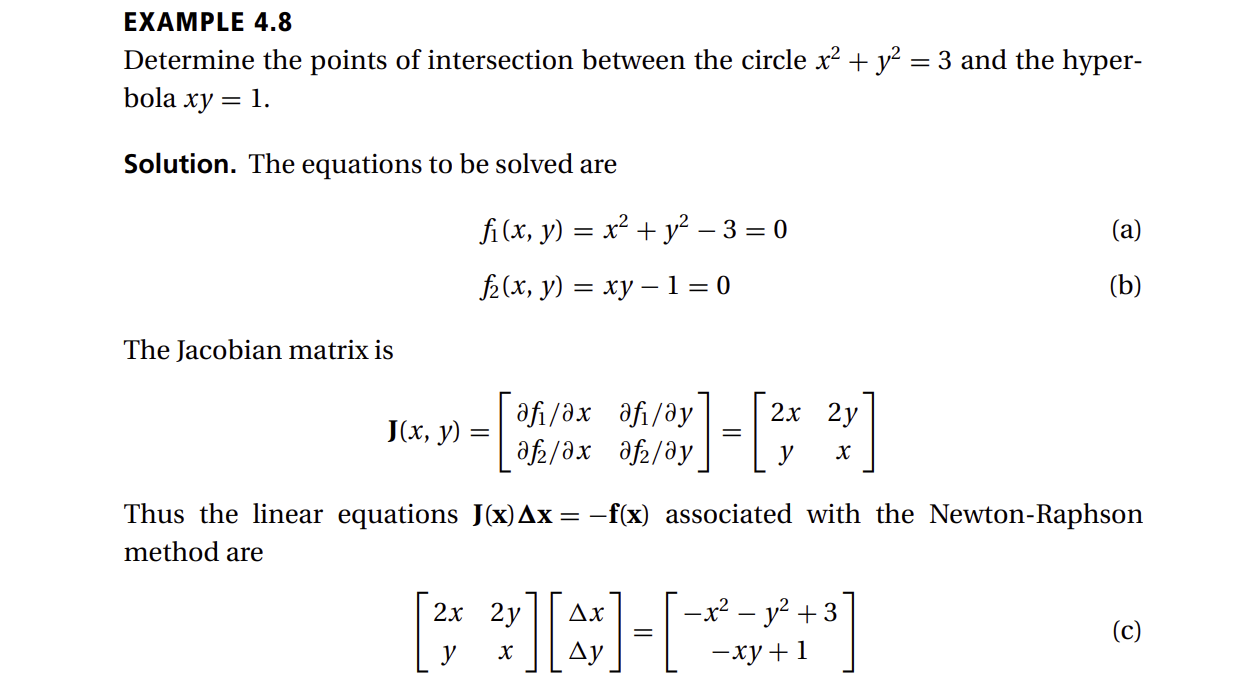



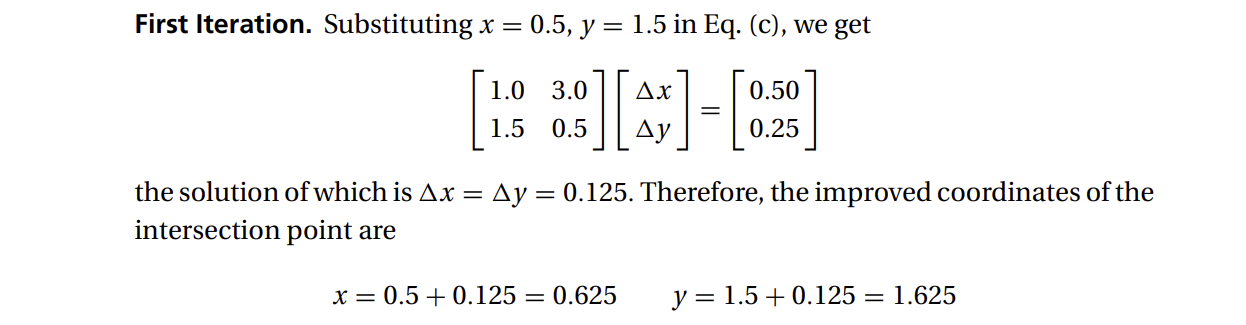

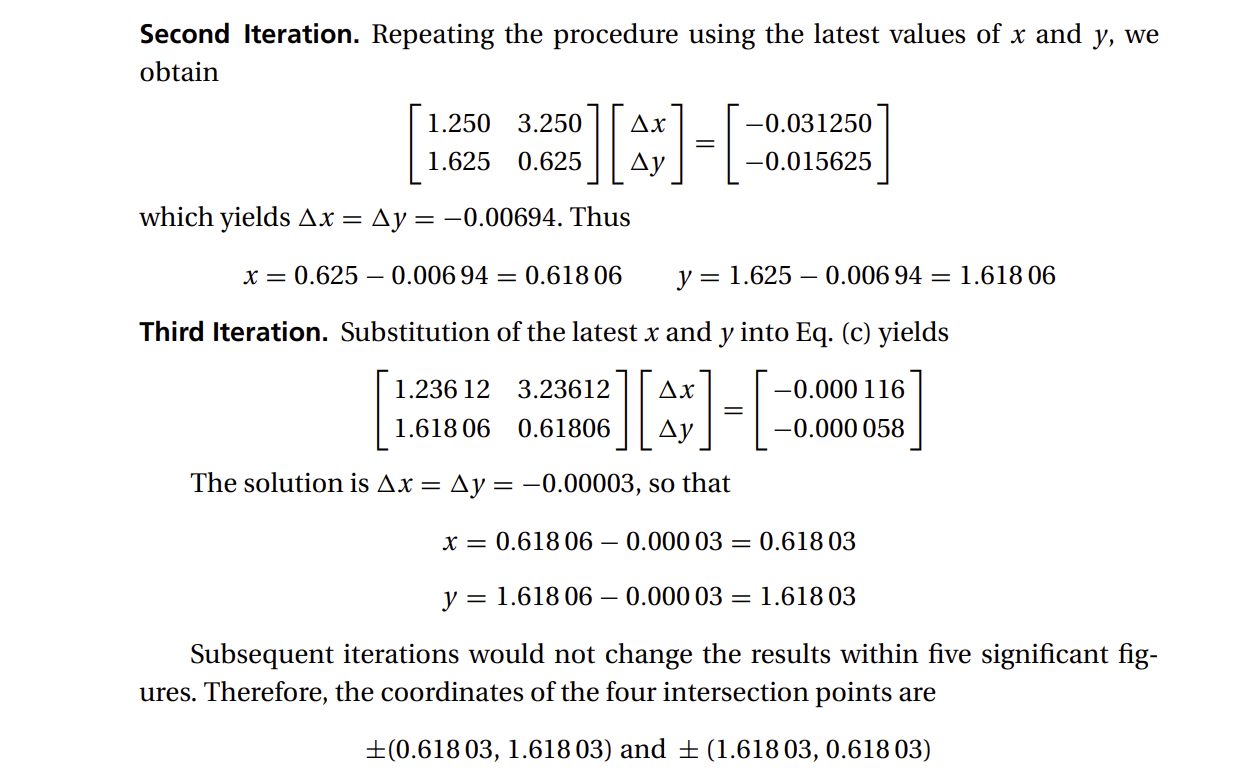

In [1]:
import numpy as np
#from gaussPivot import *
import math
x = np.array([0.5, 1.5])

def f(x):


    return f

def newtonRaphson2(f,x,tol=1.0e-9):


In [2]:

print(newtonRaphson2(f,x))


[0.61803399 1.61803399]
